<a href="https://colab.research.google.com/github/MateenAdebiyi/Supervised-Learning-Project/blob/main/Copy_of_supervised_fake_lung_3classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
# import system libs
import os
import time
import pathlib
import itertools
from PIL import Image

# import data handling tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization


# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Generate data paths with labels
train_data_dir = '/content/gdrive/MyDrive/lung_gen_supervised/train'
filepaths = []
labels = []

folds = os.listdir(train_data_dir)
for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [ ]:
# Generate data paths with labels
test_data_dir = '/content/gdrive/MyDrive/test'
filepaths = []
labels = []

folds = os.listdir(test_data_dir)
for fold in folds:
    foldpath = os.path.join(test_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries, Lseries], axis= 1)

In [ ]:
# crobed image size
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels',
                                       target_size= img_size, class_mode= 'categorical',
                                       color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels',
                                      target_size= img_size, class_mode= 'categorical',
                                      color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 12000 validated image filenames belonging to 3 classes.
Found 3000 validated image filenames belonging to 3 classes.


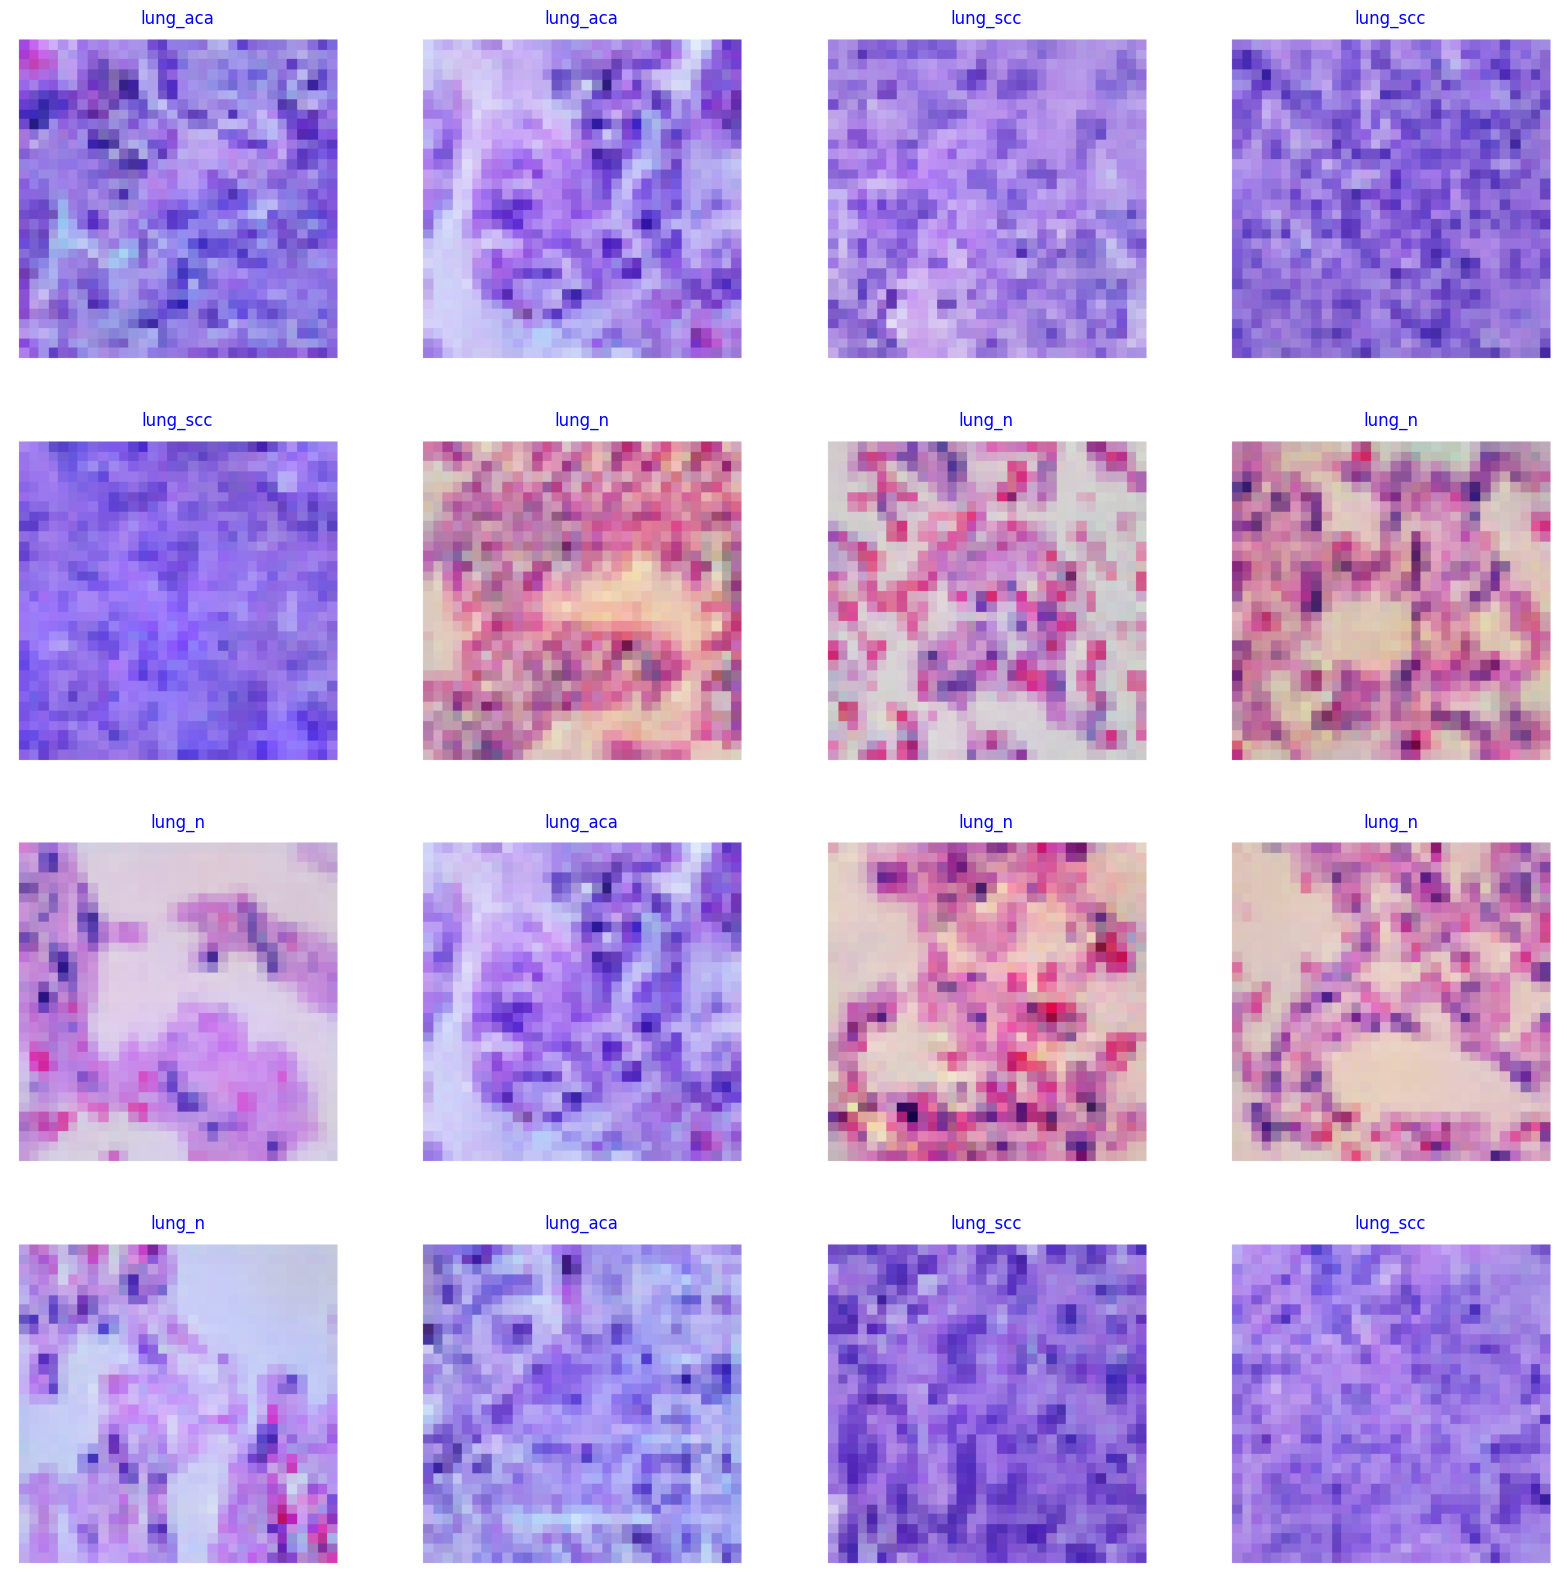

In [ ]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [ ]:
model = Sequential()

# Input Layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Bloack 1
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 2
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 3
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Fully Connected layers
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(3,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      2

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history1 = model.fit(train_gen,
                    validation_data = test_gen,
                     batch_size = 64,
                    epochs = 20)

Epoch 1/20
750/750 [==============================] - 11057s 15s/step - loss: 0.2595 - accuracy: 0.9083 - val_loss: 4.2315 - val_accuracy: 0.4067
Epoch 2/20
750/750 [==============================] - 60s 80ms/step - loss: 0.1607 - accuracy: 0.9407 - val_loss: 0.3398 - val_accuracy: 0.8877
Epoch 3/20
750/750 [==============================] - 60s 80ms/step - loss: 0.0980 - accuracy: 0.9627 - val_loss: 0.5672 - val_accuracy: 0.8133
Epoch 4/20
750/750 [==============================] - 61s 81ms/step - loss: 0.0952 - accuracy: 0.9632 - val_loss: 0.4087 - val_accuracy: 0.8660
Epoch 5/20
750/750 [==============================] - 61s 81ms/step - loss: 0.0710 - accuracy: 0.9742 - val_loss: 0.7858 - val_accuracy: 0.8300
Epoch 6/20
750/750 [==============================] - 61s 81ms/step - loss: 0.0485 - accuracy: 0.9831 - val_loss: 0.9117 - val_accuracy: 0.8047
Epoch 7/20
750/750 [==============================] - 61s 81ms/step - loss: 0.0533 - accuracy: 0.9841 - val_loss: 0.4177 - val_accurac

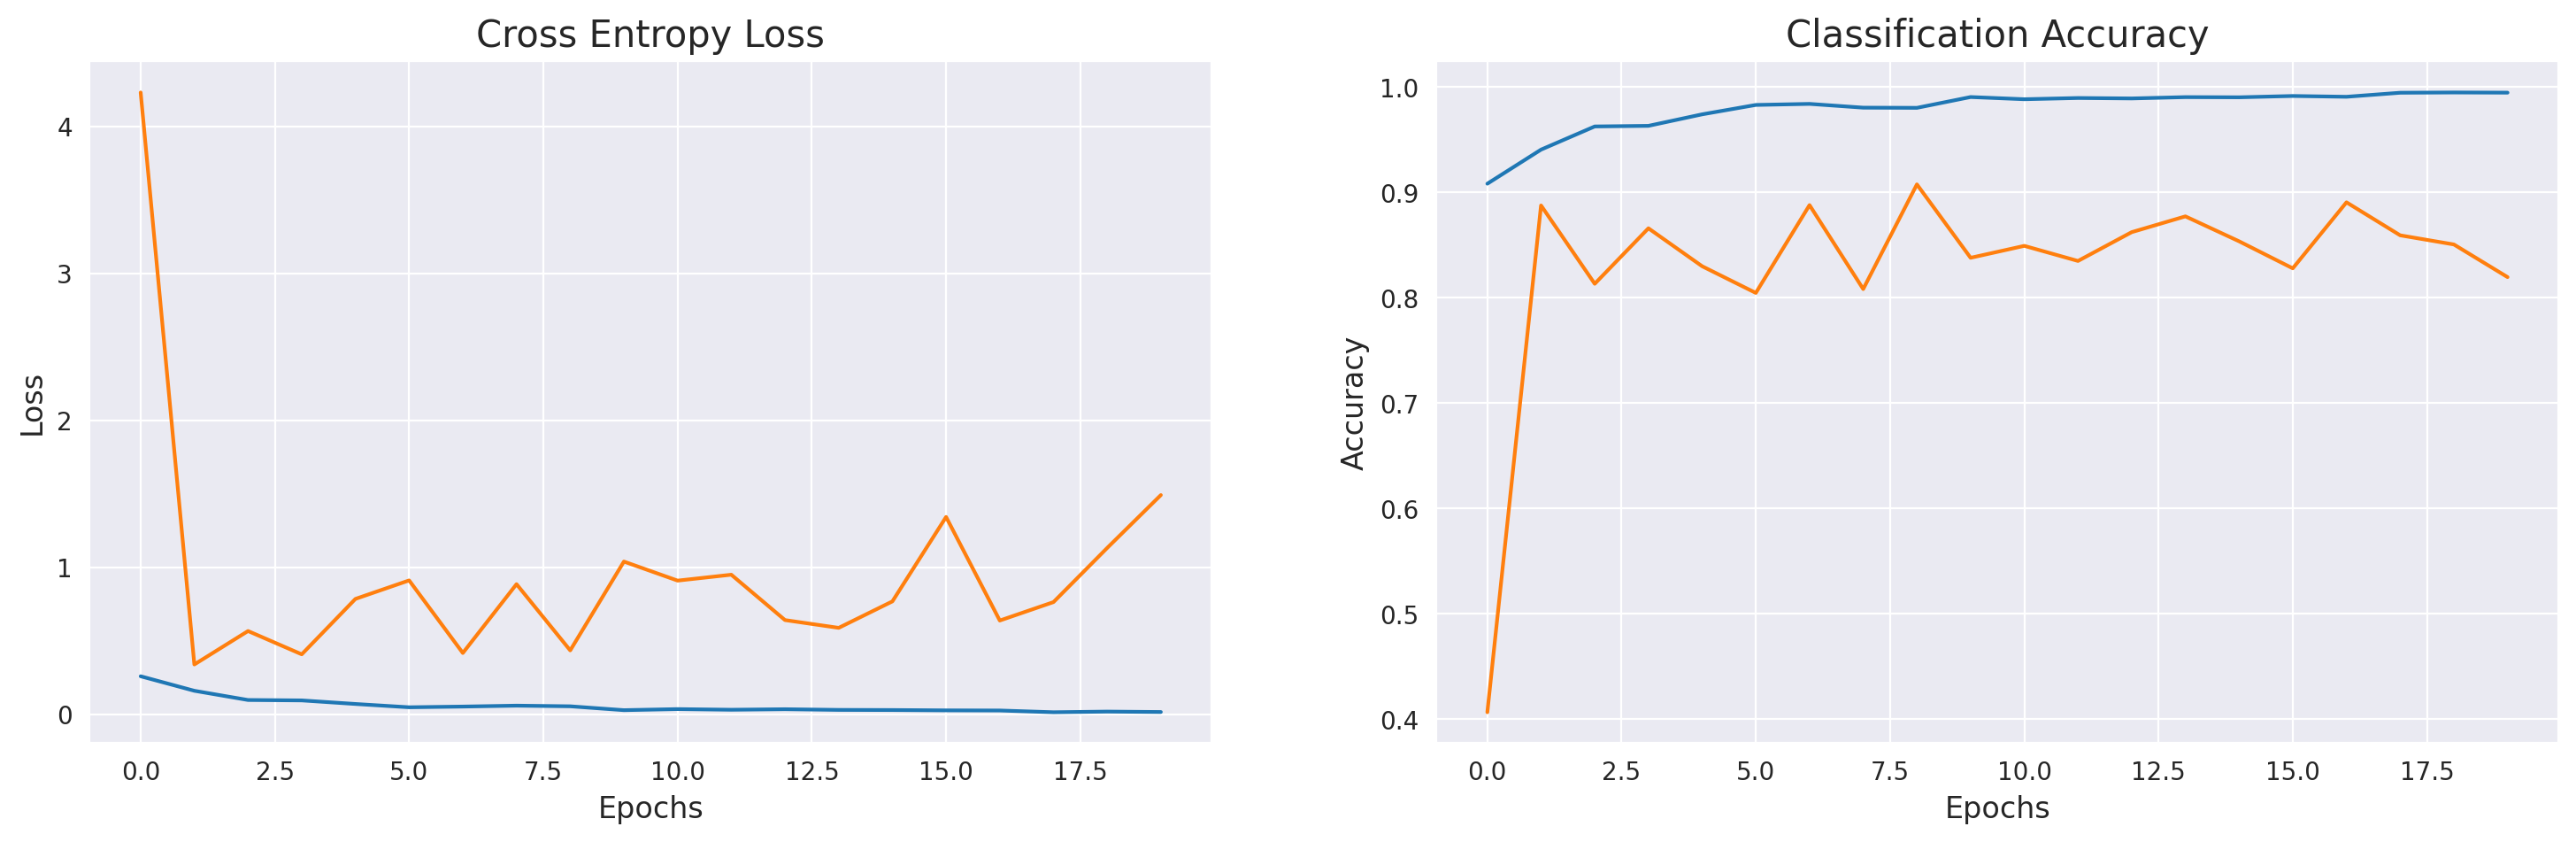

In [ ]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(history1.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [ ]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_gen)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(test_gen)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

750/750 [==============================] - 48s 64ms/step - loss: 0.0609 - accuracy: 0.9876
The accuracy of the model for training data is: 98.7583339214325
The Loss of the model for training data is: 0.060945019125938416
188/188 [==============================] - 12s 66ms/step - loss: 1.4923 - accuracy: 0.8197
The accuracy of the model for validation data is: 81.96666836738586
The Loss of the model for validation data is: 1.4923397302627563


In [ ]:
# prediction
result = model.predict(test_gen)

y_pred = np.argmax(result, axis = 1)

y_true = test_gen.labels

# Evaluvate
loss,acc = model.evaluate(test_gen)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

188/188 [==============================] - 13s 70ms/step - loss: 1.4923 - accuracy: 0.8197
The accuracy of the model for testing data is: 81.96666836738586
The Loss of the model for testing data is: 1.4923397302627563


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred,target_names=classes))

              precision    recall  f1-score   support

    lung_aca       0.66      0.96      0.78      1000
      lung_n       0.98      0.99      0.98      1000
    lung_scc       0.97      0.51      0.67      1000

    accuracy                           0.82      3000
   macro avg       0.87      0.82      0.81      3000
weighted avg       0.87      0.82      0.81      3000

